<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/resamplng_methods_exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 2.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c5ec4c5b1e33a413a1de2ed1d88633e0381d47c04b56e56cc2bb19c0e69269e5
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data
from ISLP.models import ModelSpec as MS
from ISLP import confusion_table
from ISLP.models import summarize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm





# Conceptual

## 2

a. La probabilidad de ser elegido en un muestra de tamano n y con reemplazo es de 1/n para todos los casos. Por lo que la probabilidad de no ser la jth sera de:

$$1-\frac{1}{n}$$

b. Tenemos que de la misma forma la probabilidad de que la segunda observacion del bootstrap sea la jth observacion de nuestra muestra sera de:
$$1-\frac{1}{n}$$

c. La probabilidad de que una observacion j no este en el bootstrap
$$1-\frac{1}{n}$$
Y de que toda la muestra sea no este sera de:
$$(1-\frac{1}{n})\times(1-\frac{1}{n}) ... n\ veces$$

si la bootstrap esta compuesta unicamente de de esa observacion tenemos que multiplicar sus ocurrencias ya que son eventos independientes. ya que son con reemplazo. cada muestreo no altera el estado de las cosas.


d. En el caso que $n=5$ la probabilidad de que el jth observacion de la muestre este en el bootstrap smaple sera de:
$$1 - (1-\frac{1}{n})$$

In [ ]:
def is_not_bootstrap(n):
  return (1-1/n) ** n

In [ ]:
1 - is_not_bootstrap(5)

0.632120577028895

e. $n =100$

In [ ]:
1 - is_not_bootstrap(100)

0.6339676587267709

f. $h=10000$

In [ ]:
1 - is_not_bootstrap(10000)

0.6321389535670295

la probabilidad de que el elemento jth este en la bootstrap sample es del 63%

g. calculando con diferentes valores de n y graficnado

<Axes: >

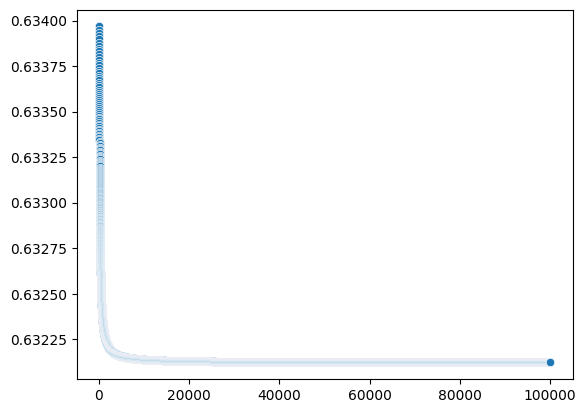

In [ ]:
n = np.arange(100, 100000)
f_n = 1 - is_not_bootstrap(n)
sns.scatterplot(x=n, y=f_n)

In [ ]:
1/100

0.01

## 3

a

Cross Validated esta implementado mediante el uso de k grupos. y el primer grupo es tratado como el de validacion hasta llegar al k - 1

b

La ventaja para el caso del set de validacion es que la cantidad de veces que se correra un modelo sera menor a n. En este caso k., sin embargo esto tambien trae un deventaja debido a que con el modo de LOOCV, tenemos que los estimados o valores reales de los errores seran insesgados mientras que con k no pasaria. Llevandonos a un problema de bias.

'Por otro lado tenemos que el Kfold tiene uhn ventaja en la autocorrelacion debido a que los grupos seran diferenciados y noi se relacioaran mucho lo que significa que tednran menor varianza que los LOOCV.


## 4

lo que buscamos es obtener la desviacion standar de una respuestas para una determianda configuracion de x0.
Entonces necesitamos usar bootstrap para generarnos diferentes dataframes.
Co n la data procedemos a aplicar la formula

# Applied

## 5

In [3]:
# usaremos la data set de default para hacer una regeresiones logisticas y luego
# usar el validation set.
# cargando data
df = load_data("Default")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
features = ["balance", "income"]
y = df.default

In [5]:
# disenando modelo
design = MS(features)
X = design.fit_transform(df)

In [6]:
# haciendo la particion de los datos
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0)
y_test = y_test == "Yes"
y_train = y_train == "Yes"

### a

### SM

In [7]:
import statsmodels.api as sm
models = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = models.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -364.78
Date:                Mon, 15 Dec 2025   Deviance:                       729.56
Time:                        00:22:09   Pearson chi2:                 2.57e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1125
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.3896      0.635    -17.935      0.0

In [8]:
predicted = results.predict(X_test)

In [9]:
np.mean(predicted > 0.5)

np.float64(0.0134)

In [10]:
print(confusion_table(y_test, predicted > 0.2))

Truth      False  True 
Predicted              
False       4697    117
True          82    104


### SKlearn

In [ ]:
# modelo
model = LogisticRegression()
model.fit(X_train, y_train)


Truth      False  True 
Predicted              
False       4697    117
True          82    104


### b

In [ ]:
results = model.predict_proba(X_test)
predicted_classes = results[:, 1] > 0.5
confusion = confusion_table(y_test, predicted_classes)
confusion

Truth,False,True
Predicted,,
False,4801,13
True,132,54


In [ ]:
(confusion.iloc[1, 0] + confusion.iloc[0,1] )/ (confusion.iloc[0,1] + confusion.iloc[0,0])

np.float64(0.030120481927710843)

### c

In [19]:
#different validation sets
# 1
for i in [1, 6, 8, 9]:
  X_train, X_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.5,
                                                      random_state=i)
  y_test = y_test == "Yes"
  y_train = y_train == "Yes"

  model = LogisticRegression()
  model.fit(X_train, y_train)

  predicted = model.predict_proba(X_test)
  predicted = predicted[:, 1] > 0.5
  confusion = confusion_table(y_test, predicted)
  print(confusion)
  print(f"error: {(confusion.iloc[1, 0] + confusion.iloc[0,1] )/ (confusion.iloc[0,1] + confusion.iloc[0,0])}")








/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Truth      False  True 
Predicted              
False       4813     28
True         107     52
error: 0.02788680024788267
Truth      False  True 
Predicted              
False       4816     17
True         121     46
error: 0.028553693358162633
Truth      False  True 
Predicted              
False       4831     10
True         106     53
error: 0.02396199132410659
Truth      False  True 
Predicted              
False       4826     25
True          92     57
error: 0.02411873840445269


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Podemos apreciar que lso resultados peuden variar en diferentes configuraciones de validation sets, esto promueve el hecho de que un enfoque del muestreo tiene efectos en los desarrollos de modelos.

### d

In [14]:
# Ahora vamos a considera una variable dummmy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


In [15]:
df.student

,student
0,No
1,Yes
2,No
3,No
4,No
...,...
9995,No
9996,No
9997,No
9998,No


In [20]:
features = ["student", "balance", "income"]
design = MS(features)
X = design.fit_transform(df)

y = df.default

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0)
# model
model = LogisticRegression()
model.fit(X_train, y_train)

predicted = model.predict_proba(X_test)
predicted = predicted[:, 1] > 0.5
confusion = confusion_table(y_test == "Yes", predicted)
print((confusion.iloc[0,1] + confusion.iloc[1, 0]) / (confusion.iloc[0,0] + confusion.iloc[1,1]))







0.030290541932825057


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


podemos apreciar que el uso del feature student no mejora el error de pruebas anteriores que no usaron este feuature, por lo que lo descartamos.

## Ejercicio 6

In [24]:
# Vamos a calcular la desviacion estandar de los coeficientes de la regresion
# logistica
df = load_data('Default')

In [25]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### a

In [37]:
# cHaADKL\;'lculo de el std de lso coeficientes usando la regresion logistica
features = ["balance", "income"]

design  = MS(features)
X = design.fit_transform(df)
y = df.default == "Yes"

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state=1)

model = sm.GLM(y_train, X_train,
               family=sm.families.Binomial())

result = model.fit()
print(summarize(result))

                coef   std err       z  P>|z|
intercept -11.858100  0.528000 -22.477    0.0
balance     0.005900  0.000000  21.078    0.0
income      0.000022  0.000006   3.707    0.0


In [41]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -551.52
Date:                Mon, 15 Dec 2025   Deviance:                       1103.0
Time:                        02:35:11   Pearson chi2:                 4.14e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.8581      0.528    -22.477      0.0

### b

In [51]:
def boot_fn(features, y_, df, idx):
  design = MS(features)
  X = design.fit_transform(df)
  y = df[y_] == "Yes"

  X_train = X.iloc[idx]
  y_train = y.iloc[idx]

  model = sm.GLM(y_train, X_train,
                 family = sm.families.Binomial())

  result = model.fit()
  return result.params


In [56]:
features = ["income", "balance"]
y = "default"
print(boot_fn(features, y, df, range(500)) ** 2)

intercept    1.363971e+02
income       6.354020e-10
balance      3.333916e-05
dtype: float64


In [53]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [58]:
# using bootstrap vamos a calcular los estimados del SE de los coeficientes
def boot_SE(func,
            df,
            B=1000,
            seed=0):
  rng = np.random.default_rng(seed)
  features = ["income", "balance"]
  y = "default"
  first, second = 0, 0
  for _ in range(B):
    idx = rng.choice(df.index, size=len(df), replace=True)
    params = func(features, y, df, idx)
    first += params
    second  += params ** 2
  return np.sqrt(second / B - (first / B) ** 2)







In [60]:
boot_SE(boot_fn,
        df,
        1000,
        0)

,0
intercept,0.435692
income,0.000005
balance,0.000230
